In [355]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


#  Packages & Imports

In [356]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn as skl
import warnings
import statsmodels.api as sm

from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict, ShuffleSplit, validation_curve, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer, RobustScaler, LabelEncoder, scale, MinMaxScaler, PolynomialFeatures, Imputer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.feature_selection import RFE,SelectFromModel

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.datasets import make_classification

from xgboost import XGBClassifier 
from xgboost import plot_importance

from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter('ignore')


In [357]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [358]:
#Load Datasets
train_data = pd.read_csv("training_set_values.csv")
train_labels = pd.read_csv("training_set_labels.csv")
test_data = pd.read_csv("test_set_values.csv")


In [359]:
#Join Labels with Train data
train_labels = train_labels.drop(columns='id')
train_data = train_data.join(train_labels)


In [360]:
train_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [361]:
test_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [362]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [363]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
id                       14850 non-null int64
amount_tsh               14850 non-null float64
date_recorded            14850 non-null object
funder                   13981 non-null object
gps_height               14850 non-null int64
installer                13973 non-null object
longitude                14850 non-null float64
latitude                 14850 non-null float64
wpt_name                 14850 non-null object
num_private              14850 non-null int64
basin                    14850 non-null object
subvillage               14751 non-null object
region                   14850 non-null object
region_code              14850 non-null int64
district_code            14850 non-null int64
lga                      14850 non-null object
ward                     14850 non-null object
population               14850 non-null int64
public_meeting           14029 non-null object
r

In [364]:
#Drop id and recorded from train dataset 
train_data= train_data.drop(columns=['id'])
train_data= train_data.drop(columns=['recorded_by'])


In [365]:
#Drop id and recorded from test dataset 
test_id= test_data['id']
test_data= test_data.drop(columns=['id'])
test_data= test_data.drop(columns=['recorded_by'])

# Data Preparation Proposals
Keeping all transformations in the same cell in an effort to make easy to recreate all steps for the Test set

In [366]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 39 columns):
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
scheme_management        55523 non-null object


In [367]:
#Fields that require intensive review are: installer, funder, scheme_name, ward, lga, wpt_name, subvillage
grouping_col = train_data[[
'extraction_type', 
'scheme_management',
'region_code'
]]

In [368]:
for i in grouping_col.columns:
    inspect = grouping_col[i].value_counts()/len(grouping_col)
    print(inspect.head(15))

gravity              0.450842
nira/tanira          0.137273
other                0.108249
submersible          0.080202
swn 80               0.061785
mono                 0.048232
india mark ii        0.040404
afridev              0.029798
ksb                  0.023822
other - rope pump    0.007593
other - swn 81       0.003855
windmill             0.001970
india mark iii       0.001650
cemo                 0.001515
other - play pump    0.001431
Name: extraction_type, dtype: float64
VWC                 0.619411
WUG                 0.087643
Water authority     0.053081
WUA                 0.048535
Water Board         0.046263
Parastatal          0.028283
Private operator    0.017896
Company             0.017862
Other               0.012896
SWC                 0.001633
Trust               0.001212
None                0.000017
Name: scheme_management, dtype: float64
11    0.089226
17    0.084360
12    0.078098
3     0.073721
5     0.068013
18    0.055960
19    0.051296
2     0.050909
16  

Transform Training Dataset

In [369]:
# train_temp = train_data.copy()

# # installer - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
# def replace(x):
#     if x in list(['DWE', 'Government','RWE','Commu','DANIDA']):
#         return x
#     else:
#         return 'other'
# train_temp.installer = train_temp.installer.map(replace)

# # funder - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
# def replace(x):
#     if x in list(['Government Of Tanzania',
# 'Danida',
# 'Hesawa',
# 'Rwssp',
# 'World Bank',
# 'Kkkt',
# 'World Vision',
# 'Unicef',
# 'Tasaf',
# 'District Council']):
#         return x
#     else:
#         return 'other'
# train_temp.funder = train_temp.funder.map(replace)

# # lga - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
# def replace(x):
#     if x in list(['Njombe',
# 'Arusha Rural',
# 'Moshi Rural',
# 'Bariadi',
# 'Rungwe',
# 'Kilosa',
# 'Kasulu',
# 'Mbozi',
# 'Meru',
# 'Bagamoyo']):
#         return x
#     else:
#         return 'other'
# train_temp.lga = train_temp.lga.map(replace)


# #Eliminate scheme_name from the dataset.
# train_temp= train_temp.drop(columns=['scheme_name'])

# # Eliminate ward from dataset
# train_temp= train_temp.drop(columns=['ward'])

# # Eliminate wpt_name from dataset#
# train_temp= train_temp.drop(columns=['wpt_name'])

# # Eliminate subvillage from dataset#
# train_temp= train_temp.drop(columns=['subvillage'])

# #Choose Between Region and Region_Code and District Code
# #train_temp= train_temp.drop(columns=['region'])
# #train_temp= train_temp.drop(columns=['region_code'])
# #train_temp= train_temp.drop(columns=['district_code'])

# #Construction Year, Bin values per decade --- Note: that (-1, 1960] is the same as Unknown
# year_bins = [-1, 1960, 1990, 2015]
# train_temp['construction_year_bin'] = pd.cut(train_temp.construction_year,year_bins,labels=False, retbins=False, right=False)
# train_temp['construction_year_bin'] = train_temp["construction_year_bin"].astype('category') 
# train_temp= train_temp.drop(columns=['construction_year'])

# #how to treat, date_recorded?
# train_temp.date_recorded = pd.to_datetime(train_temp.date_recorded)
# train_temp.date_recorded = pd.to_datetime(train_temp.date_recorded)
# train_temp.date_recorded = pd.datetime(2014, 1, 1) - pd.to_datetime(train_temp.date_recorded)
# train_temp.columns = ['days_since_recorded' if x=='date_recorded' else x for x in train_temp.columns]
# train_temp.days_since_recorded = train_temp.days_since_recorded.astype('timedelta64[D]').astype(int)

# recorded_bins = [1, 500, 1000, 2000, 4100]
# train_temp['days_since_recorded_bin'] = pd.cut(train_temp.days_since_recorded,recorded_bins,labels=False, retbins=False, right=False)
# train_temp['days_since_recorded_bin'] = train_temp["days_since_recorded_bin"].astype('category') 

# #Is longitude and Latitude relevant to the model
# # train_temp= train_temp.drop(columns=['longitude'])
# # train_temp= train_temp.drop(columns=['latitude'])

# #Decide between waterpoint_type & waterpoint_type_group
# # train_temp= train_temp.drop(columns=['waterpoint_type'])
# # train_temp= train_temp.drop(columns=['waterpoint_type_group'])

# #Decide between extraction_type & extraction_type_group & extraction_type_class
# # train_temp= train_temp.drop(columns=['extraction_type'])
# # train_temp= train_temp.drop(columns=['extraction_type_group'])
# # train_temp= train_temp.drop(columns=['extraction_type_class'])



In [370]:
train_temp = train_data.copy()

# #amount_tsh impute Functional value 0 for mean
# amount_tsh_mean = train_temp.amount_tsh.mean()
# amount_tsh_median = train_temp.amount_tsh.median()

# #Impute values 0 with mean from amount_tsh where status_group == 'functional'
# train_temp.amount_tsh = train_temp.amount_tsh.replace(0, amount_tsh_mean)

# #Impute values 0 with mean from amount_tsh where status_group == 'functional'
# train_temp.amount_tsh[train_temp.status_group == 'functional needs repair'] = train_temp.amount_tsh.replace(0, amount_repair_mean)

# installer - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
def replace(x):
    if x in list(['DWE', 'Government','RWE','Commu','DANIDA']):
        return x
    else:
        return 'other'
train_temp.installer = train_temp.installer.map(replace)

# funder - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
def replace(x):
    if x in list(['Government Of Tanzania',
'Danida',
'Hesawa',
'Rwssp',
'World Bank',
'Kkkt',
'World Vision',
'Unicef',
'Tasaf',
'District Council']):
        return x
    else:
        return 'other'
train_temp.funder = train_temp.funder.map(replace)

# lga - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
def replace(x):
    if x in list(['Njombe',
'Arusha Rural',
'Moshi Rural',
'Bariadi',
'Rungwe',
'Kilosa',
'Kasulu',
'Mbozi',
'Meru',
'Bagamoyo']):
        return x
    else:
        return 'other'
train_temp.lga = train_temp.lga.map(replace)

# extraction_type - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
def replace(x):
    if x in list(['gravity',
'nira/tanira',
'submersible',
'swn 80',
'mono',
'india mark ii',
'afridev',
'ksb']):
        return x
    else:
        return 'other'
train_temp.extraction_type = train_temp.extraction_type.map(replace)

# scheme_management - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
def replace(x):
    if x in list([
'VWC',
'WUG',
'Water authority',
'WUA',
'Water Board',
'Parastatal',
'Private operator',
'Company']):
        return x
    else:
        return 'other'
train_temp.scheme_management = train_temp.scheme_management.map(replace)

# region_code - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
def replace(x):
    if x in list([11,17,12,3,5,18,19,2,16,10,4,1,13,14,20]):
        return x
    else:
        return 'other'
train_temp.region_code = train_temp.region_code.map(replace)


#Eliminate scheme_name from the dataset.
train_temp= train_temp.drop(columns=['scheme_name'])

# Eliminate ward from dataset
train_temp= train_temp.drop(columns=['ward'])

# Eliminate wpt_name from dataset#
train_temp= train_temp.drop(columns=['wpt_name'])

# Eliminate subvillage from dataset#
train_temp= train_temp.drop(columns=['subvillage'])

#Choose Between Region and Region_Code and District Code
#train_temp= train_temp.drop(columns=['region'])
#train_temp= train_temp.drop(columns=['region_code'])
#train_temp= train_temp.drop(columns=['district_code'])

#Construction Year, Bin values per decade --- Note: that (-1, 1960] is the same as Unknown
year_bins = [-1, 1960, 1990, 2015]
train_temp['construction_year_bin'] = pd.cut(train_temp.construction_year,year_bins,labels=False, retbins=False, right=False)
train_temp['construction_year_bin'] = train_temp["construction_year_bin"].astype('category') 
train_temp= train_temp.drop(columns=['construction_year'])

#how to treat, date_recorded?
train_temp.date_recorded = pd.to_datetime(train_temp.date_recorded)
train_temp.date_recorded = pd.to_datetime(train_temp.date_recorded)
train_temp.date_recorded = pd.datetime(2014, 1, 1) - pd.to_datetime(train_temp.date_recorded)
train_temp.columns = ['days_since_recorded' if x=='date_recorded' else x for x in train_temp.columns]
train_temp.days_since_recorded = train_temp.days_since_recorded.astype('timedelta64[D]').astype(int)

#recorded_bins = [1, 500, 1000, 2000, 4100]
#train_temp['days_since_recorded_bin'] = pd.cut(train_temp.days_since_recorded,recorded_bins,labels=False, retbins=False, right=False)
#train_temp['days_since_recorded_bin'] = train_temp["days_since_recorded_bin"].astype('category') 

#Is longitude and Latitude relevant to the model
# train_temp= train_temp.drop(columns=['longitude'])
# train_temp= train_temp.drop(columns=['latitude'])

#Decide between waterpoint_type & waterpoint_type_group
# train_temp= train_temp.drop(columns=['waterpoint_type'])
# train_temp= train_temp.drop(columns=['waterpoint_type_group'])

#Decide between extraction_type & extraction_type_group & extraction_type_class
# train_temp= train_temp.drop(columns=['extraction_type'])
# train_temp= train_temp.drop(columns=['extraction_type_group'])
# train_temp= train_temp.drop(columns=['extraction_type_class'])



In [371]:
test_temp = test_data.copy()

# #amount_tsh impute Functional value 0 for mean
# amount_tsh_mean = test_temp.amount_tsh.mean()
# amount_tsh_median = test_temp.amount_tsh.median()

# #Impute values 0 with mean from amount_tsh where status_group == 'functional'
# test_temp.amount_tsh = test_temp.amount_tsh.replace(0, amount_tsh_mean)

# #Impute values 0 with mean from amount_tsh where status_group == 'functional'
# test_temp.amount_tsh[test_temp.status_group == 'functional needs repair'] = test_temp.amount_tsh.replace(0, amount_repair_mean)

# installer - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
def replace(x):
    if x in list(['DWE', 'Government','RWE','Commu','DANIDA']):
        return x
    else:
        return 'other'
test_temp.installer = test_temp.installer.map(replace)

# funder - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
def replace(x):
    if x in list(['Government Of Tanzania',
'Danida',
'Hesawa',
'Rwssp',
'World Bank',
'Kkkt',
'World Vision',
'Unicef',
'Tasaf',
'District Council']):
        return x
    else:
        return 'other'
test_temp.funder = test_temp.funder.map(replace)

# lga - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
def replace(x):
    if x in list(['Njombe',
'Arusha Rural',
'Moshi Rural',
'Bariadi',
'Rungwe',
'Kilosa',
'Kasulu',
'Mbozi',
'Meru',
'Bagamoyo']):
        return x
    else:
        return 'other'
test_temp.lga = test_temp.lga.map(replace)

# extraction_type - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
def replace(x):
    if x in list(['gravity',
'nira/tanira',
'submersible',
'swn 80',
'mono',
'india mark ii',
'afridev',
'ksb']):
        return x
    else:
        return 'other'
test_temp.extraction_type = test_temp.extraction_type.map(replace)

# scheme_management - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
def replace(x):
    if x in list([
'VWC',
'WUG',
'Water authority',
'WUA',
'Water Board',
'Parastatal',
'Private operator',
'Company']):
        return x
    else:
        return 'other'
test_temp.scheme_management = test_temp.scheme_management.map(replace)

# region_code - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
def replace(x):
    if x in list([11,17,12,3,5,18,19,2,16,10,4,1,13,14,20]):
        return x
    else:
        return 'other'
test_temp.region_code = test_temp.region_code.map(replace)


#Eliminate scheme_name from the dataset.
test_temp= test_temp.drop(columns=['scheme_name'])

# Eliminate ward from dataset
test_temp= test_temp.drop(columns=['ward'])

# Eliminate wpt_name from dataset#
test_temp= test_temp.drop(columns=['wpt_name'])

# Eliminate subvillage from dataset#
test_temp= test_temp.drop(columns=['subvillage'])

#Choose Between Region and Region_Code and District Code
#test_temp= test_temp.drop(columns=['region'])
#test_temp= test_temp.drop(columns=['region_code'])
#test_temp= test_temp.drop(columns=['district_code'])

#Construction Year, Bin values per decade --- Note: that (-1, 1960] is the same as Unknown
year_bins = [-1, 1960, 1990, 2015]
test_temp['construction_year_bin'] = pd.cut(test_temp.construction_year,year_bins,labels=False, retbins=False, right=False)
test_temp['construction_year_bin'] = test_temp["construction_year_bin"].astype('category') 
test_temp= test_temp.drop(columns=['construction_year'])

#how to treat, date_recorded?
test_temp.date_recorded = pd.to_datetime(test_temp.date_recorded)
test_temp.date_recorded = pd.to_datetime(test_temp.date_recorded)
test_temp.date_recorded = pd.datetime(2014, 1, 1) - pd.to_datetime(test_temp.date_recorded)
test_temp.columns = ['days_since_recorded' if x=='date_recorded' else x for x in test_temp.columns]
test_temp.days_since_recorded = test_temp.days_since_recorded.astype('timedelta64[D]').astype(int)

#recorded_bins = [1, 500, 1000, 2000, 4100]
#test_temp['days_since_recorded_bin'] = pd.cut(test_temp.days_since_recorded,recorded_bins,labels=False, retbins=False, right=False)
#test_temp['days_since_recorded_bin'] = test_temp["days_since_recorded_bin"].astype('category') 

#Is longitude and Latitude relevant to the model
# test_temp= test_temp.drop(columns=['longitude'])
# test_temp= test_temp.drop(columns=['latitude'])

#Decide between waterpoint_type & waterpoint_type_group
# test_temp= test_temp.drop(columns=['waterpoint_type'])
# test_temp= test_temp.drop(columns=['waterpoint_type_group'])

#Decide between extraction_type & extraction_type_group & extraction_type_class
# test_temp= test_temp.drop(columns=['extraction_type'])
# test_temp= test_temp.drop(columns=['extraction_type_group'])
# test_temp= test_temp.drop(columns=['extraction_type_class'])



Transform Train Data types

In [372]:
train_temp['district_code'] = train_temp["district_code"].astype('category') 
train_temp['region_code'] = train_temp["region_code"].astype('category') 

train_temp['funder'] = train_temp["funder"].astype('category') 
train_temp['installer'] = train_temp["installer"].astype('category') 
train_temp['lga'] = train_temp["lga"].astype('category') 

Transform Test Data types

In [373]:
test_temp['district_code'] = test_temp["district_code"].astype('category') 
test_temp['region_code'] = test_temp["region_code"].astype('category') 

test_temp['funder'] = test_temp["funder"].astype('category') 
test_temp['installer'] = test_temp["installer"].astype('category') 
test_temp['lga'] = test_temp["lga"].astype('category') 

In [374]:
len(test_temp.columns)

34

In [375]:
len(train_temp.columns)

35

In [376]:
test_temp.columns

Index(['amount_tsh', 'days_since_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'num_private', 'basin', 'region',
       'region_code', 'district_code', 'lga', 'population', 'public_meeting',
       'scheme_management', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'construction_year_bin'],
      dtype='object')

In [377]:
train_temp.columns

Index(['amount_tsh', 'days_since_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'num_private', 'basin', 'region',
       'region_code', 'district_code', 'lga', 'population', 'public_meeting',
       'scheme_management', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group', 'construction_year_bin'],
      dtype='object')

In [378]:
def numerical_features(df):
    columns = df.columns
    return df._get_numeric_data().columns

def categorical_features(df):
    numerical_columns = numerical_features(df)
    return(list(set(df.columns) - set(numerical_columns)))

def onehot_encode(df):
    numericals = df.get(numerical_features(df))
    new_df = numericals.copy()
    for categorical_column in categorical_features(df):
        new_df = pd.concat([new_df, 
                            pd.get_dummies(df[categorical_column], 
                                           prefix=categorical_column)], 
                           axis=1)
    return new_df

In [379]:
train_temp.describe()

,amount_tsh,days_since_recorded,gps_height,longitude,latitude,num_private,population
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000
mean,317.650385,642.616970,668.297239,34.077427,-5.706033e+00,0.474141,179.909983
std,2997.574558,334.216374,693.116350,6.567432,2.946019e+00,12.236230,471.482176
min,0.000000,29.000000,-90.000000,0.000000,-1.164944e+01,0.000000,0.000000
25%,0.000000,326.000000,0.000000,33.090347,-8.540621e+00,0.000000,0.000000
50%,0.000000,448.000000,369.000000,34.908743,-5.021597e+00,0.000000,25.000000
75%,20.000000,1006.000000,1319.250000,37.178387,-3.326156e+00,0.000000,215.000000
max,350000.000000,4097.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,30500.000000


In [380]:
def feature_skewness(df):
    numeric_dtypes = ['int16', 'int32', 'int64', 
                      'float16', 'float32', 'float64']
    numeric_features = []
    for i in df.columns:
        if df[i].dtype in numeric_dtypes: 
            numeric_features.append(i)

    feature_skew = df[numeric_features].apply(
        lambda x: skew(x)).sort_values(ascending=False)
    skews = pd.DataFrame({'skew':feature_skew})
    return feature_skew, numeric_features,

In [381]:
print(feature_skew)

NameError: name 'feature_skew' is not defined

In [383]:
def fix_skewness(df):
    feature_skew, numeric_features = feature_skewness(df)
    high_skew = feature_skew[feature_skew > 0.75]
    skew_index = high_skew.index
    
    for i in skew_index:
        df[i] = boxcox1p(df[i], boxcox_normmax(df[i]+1))

    skew_features = df[numeric_features].apply(
        lambda x: skew(x)).sort_values(ascending=False)
    skews = pd.DataFrame({'skew':skew_features})
    return df

In [384]:
fix_skewness(test_temp)
fix_skewness(train_temp)

,amount_tsh,days_since_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,region,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,construction_year_bin
0,8.072270,1024,other,1390,other,34.938093,-9.856322e+00,0.0,Lake Nyasa,Iringa,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2
1,0.000000,301,other,1399,other,34.698766,-2.147466e+00,0.0,Lake Victoria,Mara,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2
2,3.167322,310,other,686,other,37.460664,-3.821329e+00,0.0,Pangani,Manyara,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2
3,0.000000,338,Unicef,263,other,38.486161,-1.115530e+01,0.0,Ruvuma / Southern Coast,Mtwara,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,1
4,0.000000,903,other,0,other,31.130847,-1.825359e+00,0.0,Lake Victoria,Kagera,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,0
5,2.965161,1025,other,0,DWE,39.172796,-4.765587e+00,0.0,Pangani,Tanga,...,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional,2
6,0.000000,457,other,0,other,33.362410,-3.766365e+00,0.0,Internal,Shinyanga,...,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,0
7,0.000000,449,Rwssp,0,DWE,32.620617,-4.226198e+00,0.0,Lake Tanganyika,Shinyanga,...,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,0
8,0.000000,424,other,0,other,32.711100,-5.146712e+00,0.0,Lake Tanganyika,Tabora,...,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,0
9,0.000000,882,other,0,other,30.626991,-1.257051e+00,0.0,Lake Victoria,Kagera,...,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,0


In [385]:
train_temp.describe()

,amount_tsh,days_since_recorded,gps_height,longitude,latitude,num_private,population
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000
mean,1.505782,642.616970,668.297239,34.077427,-5.706033e+00,0.006102,5.481384
std,2.489262,334.216374,693.116350,6.567432,2.946019e+00,0.053861,5.704784
min,0.000000,29.000000,-90.000000,0.000000,-1.164944e+01,0.000000,0.000000
25%,0.000000,326.000000,0.000000,33.090347,-8.540621e+00,0.000000,0.000000
50%,0.000000,448.000000,369.000000,34.908743,-5.021597e+00,0.000000,4.774788
75%,2.965161,1006.000000,1319.250000,37.178387,-3.326156e+00,0.000000,10.330424
max,11.445334,4097.000000,2770.000000,40.345193,-2.000000e-08,0.496821,39.902577


In [395]:
test_numeric_features = test_temp[['amount_tsh','days_since_recorded','gps_height','num_private','population']]
train_numeric_features = train_temp[['amount_tsh','days_since_recorded','gps_height','num_private','population']]

In [330]:
scaler = MinMaxScaler()

temp = numeric_features
norm_temp = scaler.fit_transform(temp)
numeric_features = pd.DataFrame(norm_temp)

In [331]:
test_numeric_features.columns = ['amount_tsh','days_since_recorded','gps_height','num_private','population']
train_numeric_features.columns = ['amount_tsh','days_since_recorded','gps_height','num_private','population']
train_numeric_features.describe()

,amount_tsh,days_since_recorded,gps_height,num_private,population
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,1.505782,642.616970,668.297239,0.006102,5.481384
std,2.489262,334.216374,693.116350,0.053861,5.704784
min,0.000000,29.000000,-90.000000,0.000000,0.000000
25%,0.000000,326.000000,0.000000,0.000000,0.000000
50%,0.000000,448.000000,369.000000,0.000000,4.774788
75%,2.965161,1006.000000,1319.250000,0.000000,10.330424
max,11.445334,4097.000000,2770.000000,0.496821,39.902577


In [332]:
test_temp = test_temp.drop(columns=['amount_tsh','days_since_recorded','gps_height','num_private','population'])
train_temp = train_temp.drop(columns=['amount_tsh','days_since_recorded','gps_height','num_private','population'])

In [333]:
test_temp = test_numeric_features.join(test_temp)
train_temp = train_numeric_features.join(train_temp)

In [334]:
train_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 35 columns):
amount_tsh               59400 non-null float64
days_since_recorded      59400 non-null int64
gps_height               59400 non-null int64
num_private              59400 non-null float64
population               59400 non-null float64
funder                   59400 non-null category
installer                59400 non-null category
longitude                59400 non-null float64
latitude                 59400 non-null float64
basin                    59400 non-null object
region                   59400 non-null object
region_code              59400 non-null category
district_code            59400 non-null category
lga                      59400 non-null category
public_meeting           56066 non-null object
scheme_management        59400 non-null object
permit                   56344 non-null object
extraction_type          59400 non-null object
extraction_type_group    59400 n

# Baseline Model

In [386]:
#Segregate trainning labels from data set 
train_temp.status_group.replace(['functional', 'non functional','functional needs repair'], [1, 2, 3], inplace=True)
train_labels = train_temp['status_group']
train_temp= train_temp.drop(columns=['status_group'])

In [387]:
train_temp.head()

,amount_tsh,days_since_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,region,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,construction_year_bin
0,8.072270,1024,other,1390,other,34.938093,-9.856322,0.0,Lake Nyasa,Iringa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2
1,0.000000,301,other,1399,other,34.698766,-2.147466,0.0,Lake Victoria,Mara,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2
2,3.167322,310,other,686,other,37.460664,-3.821329,0.0,Pangani,Manyara,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2
3,0.000000,338,Unicef,263,other,38.486161,-11.155298,0.0,Ruvuma / Southern Coast,Mtwara,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
4,0.000000,903,other,0,other,31.130847,-1.825359,0.0,Lake Victoria,Kagera,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0


In [388]:
#Data frames before the baseline
train_set = onehot_encode(train_temp)
test_set = onehot_encode(test_temp)

In [389]:
len(train_set.columns)

234

In [390]:
len(test_set.columns)

234

In [391]:
list(train_set.columns)

['amount_tsh',
 'days_since_recorded',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'population',
 'payment_type_annually',
 'payment_type_monthly',
 'payment_type_never pay',
 'payment_type_on failure',
 'payment_type_other',
 'payment_type_per bucket',
 'payment_type_unknown',
 'payment_never pay',
 'payment_other',
 'payment_pay annually',
 'payment_pay monthly',
 'payment_pay per bucket',
 'payment_pay when scheme fails',
 'payment_unknown',
 'installer_Commu',
 'installer_DANIDA',
 'installer_DWE',
 'installer_Government',
 'installer_RWE',
 'installer_other',
 'extraction_type_afridev',
 'extraction_type_gravity',
 'extraction_type_india mark ii',
 'extraction_type_ksb',
 'extraction_type_mono',
 'extraction_type_nira/tanira',
 'extraction_type_other',
 'extraction_type_submersible',
 'extraction_type_swn 80',
 'public_meeting_False',
 'public_meeting_True',
 'permit_False',
 'permit_True',
 'region_Arusha',
 'region_Dar es Salaam',
 'region_Dodoma',
 'region_Iringa

In [392]:
list(test_set.columns)

['amount_tsh',
 'days_since_recorded',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'population',
 'payment_type_annually',
 'payment_type_monthly',
 'payment_type_never pay',
 'payment_type_on failure',
 'payment_type_other',
 'payment_type_per bucket',
 'payment_type_unknown',
 'payment_never pay',
 'payment_other',
 'payment_pay annually',
 'payment_pay monthly',
 'payment_pay per bucket',
 'payment_pay when scheme fails',
 'payment_unknown',
 'installer_Commu',
 'installer_DANIDA',
 'installer_DWE',
 'installer_Government',
 'installer_RWE',
 'installer_other',
 'extraction_type_afridev',
 'extraction_type_gravity',
 'extraction_type_india mark ii',
 'extraction_type_ksb',
 'extraction_type_mono',
 'extraction_type_nira/tanira',
 'extraction_type_other',
 'extraction_type_submersible',
 'extraction_type_swn 80',
 'public_meeting_False',
 'public_meeting_True',
 'permit_False',
 'permit_True',
 'region_Arusha',
 'region_Dar es Salaam',
 'region_Dodoma',
 'region_Iringa

Train / Test Split

In [393]:
train_labels
train_set

X_train, X_test, y_train, y_test = train_test_split(train_set, train_labels, train_size=0.8)

Random Forest 

In [394]:
# Randon Forest - Under 2 minutes
rf = RFC(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)

rf_score = rf.score(X_test,y_test)

print('Accuracy:', rf_score)

Accuracy: 0.8052188552188552


In [300]:
# XGBoost - Under 4 minutes Simple Model / Complex 25 min

# xgb_model = XGBClassifier(objective="multi:softprob", random_state=42)
# xgb_model = XGBClassifier(objective="multi:softprob",
#                       learning_rate= 0.075,
#                       max_depth= 6,
#                       min_samples_leaf= 16,
#                       subsample= 0.8,
#                       max_features= 1.0,
#                       n_estimators= 1000,
#                       gamma=1)
#Accuracy: 0.8064814814814815
# xgb_model = XGBClassifier(objective="multi:softprob",
#                       learning_rate= 0.025,
#                       max_depth= 6,
#                       min_samples_leaf= 16,
#                       subsample= 0.8,
#                       max_features= 1.0,
#                       n_estimators= 1000,
#                       gamma=1)
#Accuracy: 0.7962121212121213
# xgb_model = XGBClassifier(objective="multi:softprob",
#                       learning_rate= 0.025,
#                       max_depth= 6,
#                       min_samples_leaf= 16,
#                       subsample= 0.8,
#                       max_features= 1.0,
#                       n_estimators= 1000,
#                       gamma=1)
# xgb_model = XGBClassifier(objective="multi:softprob",
#                       learning_rate= 1,
#                       max_depth= 6,
#                       min_samples_leaf= 16,
#                       subsample= 0.8,
#                       max_features= 1.0,
#                       n_estimators= 1000,
#                       gamma=1)
#Accuracy: 0.7920875420875421
# xgb_model = XGBClassifier(objective="multi:softprob",
#                       learning_rate= 0.08,
#                       max_depth= 6,
#                       min_samples_leaf= 16,
#                       subsample= 0.8,
#                       max_features= 1.0,
#                       n_estimators= 1000,
#                       gamma=1)
# Accuracy: 0.8074074074074075 - xgb_v2
xgb_model = XGBClassifier(objective="multi:softprob",
                      learning_rate= 0.08,
                      max_depth= 8,
                      min_samples_leaf= 16,
                      subsample= 0.8,
                      max_features= 1.0,
                      n_estimators= 1000,
                      gamma=1)

xgb_model.fit(X_train, y_train)

xgb_score = xgb_model.score(X_test,y_test)

print('Accuracy:', xgb_score)

Accuracy: 0.8127946127946128


In [218]:
eval_set = [(X_train, y_train), (X_test, y_test)]
#eval_metric = ["auc","error"]
eval_metric = "mlogloss"
%time xgb_model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-mlogloss:1.0531	validation_1-mlogloss:1.05384
[1]	validation_0-mlogloss:1.01293	validation_1-mlogloss:1.01437
[2]	validation_0-mlogloss:0.977128	validation_1-mlogloss:0.979275
[3]	validation_0-mlogloss:0.944856	validation_1-mlogloss:0.947598
[4]	validation_0-mlogloss:0.916078	validation_1-mlogloss:0.919468
[5]	validation_0-mlogloss:0.890532	validation_1-mlogloss:0.894268
[6]	validation_0-mlogloss:0.867345	validation_1-mlogloss:0.871586
[7]	validation_0-mlogloss:0.845729	validation_1-mlogloss:0.850577
[8]	validation_0-mlogloss:0.82625	validation_1-mlogloss:0.831533
[9]	validation_0-mlogloss:0.808399	validation_1-mlogloss:0.814104
[10]	validation_0-mlogloss:0.792189	validation_1-mlogloss:0.79834
[11]	validation_0-mlogloss:0.777389	validation_1-mlogloss:0.783952
[12]	validation_0-mlogloss:0.763653	validation_1-mlogloss:0.770673
[13]	validation_0-mlogloss:0.751247	validation_1-mlogloss:0.758659
[14]	validation_0-mlogloss:0.739228	validation_1-mlogloss:0.747262
[15]	validat

[123]	validation_0-mlogloss:0.504892	validation_1-mlogloss:0.546574
[124]	validation_0-mlogloss:0.504232	validation_1-mlogloss:0.546202
[125]	validation_0-mlogloss:0.503695	validation_1-mlogloss:0.545898
[126]	validation_0-mlogloss:0.503215	validation_1-mlogloss:0.545497
[127]	validation_0-mlogloss:0.502672	validation_1-mlogloss:0.545155
[128]	validation_0-mlogloss:0.502222	validation_1-mlogloss:0.544852
[129]	validation_0-mlogloss:0.501796	validation_1-mlogloss:0.544617
[130]	validation_0-mlogloss:0.501092	validation_1-mlogloss:0.54412
[131]	validation_0-mlogloss:0.500639	validation_1-mlogloss:0.54385
[132]	validation_0-mlogloss:0.499863	validation_1-mlogloss:0.543278
[133]	validation_0-mlogloss:0.499099	validation_1-mlogloss:0.542758
[134]	validation_0-mlogloss:0.498603	validation_1-mlogloss:0.54249
[135]	validation_0-mlogloss:0.497606	validation_1-mlogloss:0.541854
[136]	validation_0-mlogloss:0.497288	validation_1-mlogloss:0.541675
[137]	validation_0-mlogloss:0.496626	validation_1-m

[244]	validation_0-mlogloss:0.448439	validation_1-mlogloss:0.516673
[245]	validation_0-mlogloss:0.448072	validation_1-mlogloss:0.516534
[246]	validation_0-mlogloss:0.44774	validation_1-mlogloss:0.516411
[247]	validation_0-mlogloss:0.447318	validation_1-mlogloss:0.51632
[248]	validation_0-mlogloss:0.446977	validation_1-mlogloss:0.516135
[249]	validation_0-mlogloss:0.446598	validation_1-mlogloss:0.515955
[250]	validation_0-mlogloss:0.446373	validation_1-mlogloss:0.51591
[251]	validation_0-mlogloss:0.446105	validation_1-mlogloss:0.515764
[252]	validation_0-mlogloss:0.445774	validation_1-mlogloss:0.515623
[253]	validation_0-mlogloss:0.445328	validation_1-mlogloss:0.515423
[254]	validation_0-mlogloss:0.445091	validation_1-mlogloss:0.51536
[255]	validation_0-mlogloss:0.444804	validation_1-mlogloss:0.515189
[256]	validation_0-mlogloss:0.444472	validation_1-mlogloss:0.515107
[257]	validation_0-mlogloss:0.44418	validation_1-mlogloss:0.514957
[258]	validation_0-mlogloss:0.443749	validation_1-mlo

[365]	validation_0-mlogloss:0.410586	validation_1-mlogloss:0.502457
[366]	validation_0-mlogloss:0.410247	validation_1-mlogloss:0.502336
[367]	validation_0-mlogloss:0.410035	validation_1-mlogloss:0.502307
[368]	validation_0-mlogloss:0.409873	validation_1-mlogloss:0.502273
[369]	validation_0-mlogloss:0.409612	validation_1-mlogloss:0.502155
[370]	validation_0-mlogloss:0.409362	validation_1-mlogloss:0.502082
[371]	validation_0-mlogloss:0.409193	validation_1-mlogloss:0.502047
[372]	validation_0-mlogloss:0.40903	validation_1-mlogloss:0.502012
[373]	validation_0-mlogloss:0.408809	validation_1-mlogloss:0.501955
[374]	validation_0-mlogloss:0.40863	validation_1-mlogloss:0.501956
[375]	validation_0-mlogloss:0.408352	validation_1-mlogloss:0.501817
[376]	validation_0-mlogloss:0.408055	validation_1-mlogloss:0.501725
[377]	validation_0-mlogloss:0.40787	validation_1-mlogloss:0.501704
[378]	validation_0-mlogloss:0.407656	validation_1-mlogloss:0.501668
[379]	validation_0-mlogloss:0.407397	validation_1-m

[486]	validation_0-mlogloss:0.383169	validation_1-mlogloss:0.495449
[487]	validation_0-mlogloss:0.383	validation_1-mlogloss:0.495443
[488]	validation_0-mlogloss:0.382734	validation_1-mlogloss:0.495366
[489]	validation_0-mlogloss:0.382482	validation_1-mlogloss:0.495296
[490]	validation_0-mlogloss:0.382311	validation_1-mlogloss:0.495253
[491]	validation_0-mlogloss:0.382127	validation_1-mlogloss:0.495264
[492]	validation_0-mlogloss:0.381918	validation_1-mlogloss:0.495199
[493]	validation_0-mlogloss:0.381708	validation_1-mlogloss:0.49518
[494]	validation_0-mlogloss:0.381549	validation_1-mlogloss:0.495133
[495]	validation_0-mlogloss:0.381377	validation_1-mlogloss:0.495061
[496]	validation_0-mlogloss:0.381193	validation_1-mlogloss:0.495002
[497]	validation_0-mlogloss:0.380954	validation_1-mlogloss:0.494935
[498]	validation_0-mlogloss:0.380791	validation_1-mlogloss:0.494927
[499]	validation_0-mlogloss:0.380582	validation_1-mlogloss:0.494867
[500]	validation_0-mlogloss:0.380353	validation_1-ml

[607]	validation_0-mlogloss:0.360544	validation_1-mlogloss:0.490364
[608]	validation_0-mlogloss:0.360417	validation_1-mlogloss:0.490339
[609]	validation_0-mlogloss:0.360243	validation_1-mlogloss:0.490283
[610]	validation_0-mlogloss:0.360064	validation_1-mlogloss:0.490242
[611]	validation_0-mlogloss:0.359891	validation_1-mlogloss:0.490229
[612]	validation_0-mlogloss:0.359754	validation_1-mlogloss:0.490209
[613]	validation_0-mlogloss:0.35958	validation_1-mlogloss:0.49018
[614]	validation_0-mlogloss:0.359416	validation_1-mlogloss:0.490151
[615]	validation_0-mlogloss:0.359224	validation_1-mlogloss:0.490051
[616]	validation_0-mlogloss:0.359149	validation_1-mlogloss:0.490038
[617]	validation_0-mlogloss:0.358945	validation_1-mlogloss:0.490022
[618]	validation_0-mlogloss:0.358712	validation_1-mlogloss:0.489944
[619]	validation_0-mlogloss:0.358543	validation_1-mlogloss:0.489917
[620]	validation_0-mlogloss:0.358403	validation_1-mlogloss:0.489874
[621]	validation_0-mlogloss:0.358217	validation_1-

[728]	validation_0-mlogloss:0.341987	validation_1-mlogloss:0.487201
[729]	validation_0-mlogloss:0.341843	validation_1-mlogloss:0.487212
[730]	validation_0-mlogloss:0.341709	validation_1-mlogloss:0.487209
[731]	validation_0-mlogloss:0.341623	validation_1-mlogloss:0.487213
[732]	validation_0-mlogloss:0.341459	validation_1-mlogloss:0.487161
[733]	validation_0-mlogloss:0.341261	validation_1-mlogloss:0.487128
[734]	validation_0-mlogloss:0.341083	validation_1-mlogloss:0.487095
[735]	validation_0-mlogloss:0.340962	validation_1-mlogloss:0.487087
[736]	validation_0-mlogloss:0.340788	validation_1-mlogloss:0.487048
[737]	validation_0-mlogloss:0.340634	validation_1-mlogloss:0.487017
[738]	validation_0-mlogloss:0.340514	validation_1-mlogloss:0.487002
[739]	validation_0-mlogloss:0.340322	validation_1-mlogloss:0.486973
[740]	validation_0-mlogloss:0.340171	validation_1-mlogloss:0.486917
[741]	validation_0-mlogloss:0.340045	validation_1-mlogloss:0.486883
[742]	validation_0-mlogloss:0.339943	validation_

[849]	validation_0-mlogloss:0.32575	validation_1-mlogloss:0.484813
[850]	validation_0-mlogloss:0.325637	validation_1-mlogloss:0.484786
[851]	validation_0-mlogloss:0.325557	validation_1-mlogloss:0.484793
[852]	validation_0-mlogloss:0.325448	validation_1-mlogloss:0.484798
[853]	validation_0-mlogloss:0.325337	validation_1-mlogloss:0.4848
[854]	validation_0-mlogloss:0.325221	validation_1-mlogloss:0.484803
[855]	validation_0-mlogloss:0.325129	validation_1-mlogloss:0.484763
[856]	validation_0-mlogloss:0.325028	validation_1-mlogloss:0.484743
[857]	validation_0-mlogloss:0.324935	validation_1-mlogloss:0.484768
[858]	validation_0-mlogloss:0.324834	validation_1-mlogloss:0.484776
[859]	validation_0-mlogloss:0.324746	validation_1-mlogloss:0.484807
[860]	validation_0-mlogloss:0.32464	validation_1-mlogloss:0.484798
[861]	validation_0-mlogloss:0.324549	validation_1-mlogloss:0.484782
[862]	validation_0-mlogloss:0.324397	validation_1-mlogloss:0.484815
[863]	validation_0-mlogloss:0.324338	validation_1-ml

[970]	validation_0-mlogloss:0.312639	validation_1-mlogloss:0.483377
[971]	validation_0-mlogloss:0.312516	validation_1-mlogloss:0.483381
[972]	validation_0-mlogloss:0.31239	validation_1-mlogloss:0.483362
[973]	validation_0-mlogloss:0.312217	validation_1-mlogloss:0.483326
[974]	validation_0-mlogloss:0.312142	validation_1-mlogloss:0.483372
[975]	validation_0-mlogloss:0.312032	validation_1-mlogloss:0.483375
[976]	validation_0-mlogloss:0.311909	validation_1-mlogloss:0.483376
[977]	validation_0-mlogloss:0.311866	validation_1-mlogloss:0.483369
[978]	validation_0-mlogloss:0.31176	validation_1-mlogloss:0.483382
[979]	validation_0-mlogloss:0.311646	validation_1-mlogloss:0.483393
[980]	validation_0-mlogloss:0.311563	validation_1-mlogloss:0.483392
[981]	validation_0-mlogloss:0.311396	validation_1-mlogloss:0.483367
[982]	validation_0-mlogloss:0.311257	validation_1-mlogloss:0.483373
[983]	validation_0-mlogloss:0.311135	validation_1-mlogloss:0.483333
[984]	validation_0-mlogloss:0.311059	validation_1-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1, learning_rate=0.075, max_delta_step=0,
       max_depth=6, max_features=1.0, min_child_weight=1,
       min_samples_leaf=16, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [301]:
def plot_features(booster, figsize):    
    fig, ax = plt.pyplot.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

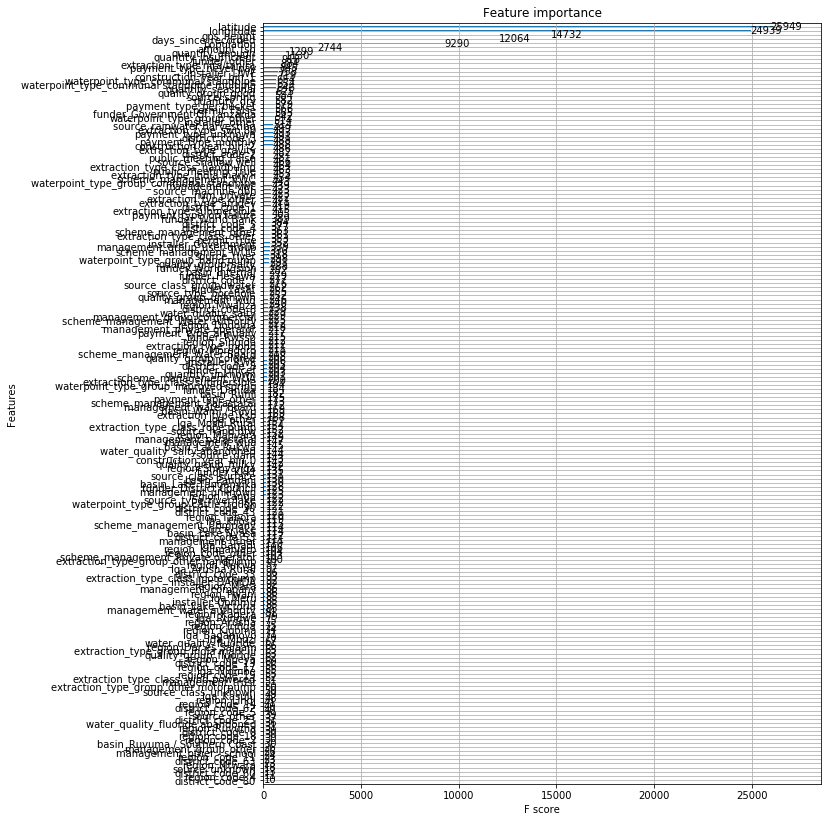

In [302]:
plot_features(xgb_model, (10,14))

In [221]:
# def model(X_train, X_test, y_train, y_test):
#     if __name__ == '__main__':
    
#         param_grid = {'learning_rate': [0.075, 0.05, 0.025],
#                       'max_depth': [4, 6, 8],
#                       'min_samples_leaf': [15, 16],
#                       'subsample': [0.8, 0.9, 1],
#                       'max_features': [1.0],
#                       'n_estimators': [1000, 500, 100],
#                       'gamma':[0,1,5]}                      

#         estimator = GridSearchCV(estimator=XGBClassifier(objective="multi:softprob", random_state=42),
#                                  param_grid=param_grid,
#                                  n_jobs=-1)

#         estimator.fit(X_train, y_train)

#         best_params = estimator.best_params_

#         print (best_params)
                                 
#         validation_accuracy = estimator.score(X_test, y_test)
#         print('Validation accuracy: ', validation_accuracy)

In [222]:
def model(X_train, X_test, y_train, y_test):
    if __name__ == '__main__':
    
        param_grid = {'learning_rate': [0.075],
                      'max_depth': [8],
                      'min_samples_leaf': [16],
                      'subsample': [0.8],
                      'max_features': [1.0],
                      'n_estimators': [1000],
                      'gamma':[1]}                      

        estimator = GridSearchCV(estimator=XGBClassifier(objective="multi:softprob", random_state=42),
                                 param_grid=param_grid,
                                 n_jobs=-1)

        estimator.fit(X_train, y_train)

        best_params = estimator.best_params_

        print (best_params)
                                 
        validation_accuracy = estimator.score(X_test, y_test)
        print('Validation accuracy: ', validation_accuracy)

In [ ]:
model(X_train, X_test, y_train, y_test)

In [225]:
def model_for_submission(features, target, test):
    if __name__ == '__main__':

         best_params = {'learning_rate': [0.075],
                        'max_depth': [14],
                        'min_samples_leaf': [16],
                        'max_features': [1.0],
                        'n_estimators': [100]}                      

         estimator = GridSearchCV(estimator=GradientBoostingClassifier(),
                                 param_grid=best_params,
                                 n_jobs=-1)

         estimator.fit(features, target)     

         predictions = estimator.predict(test)

         data = {'ID': test_id, 'status_group': predictions}

         submit = pd.DataFrame(data=data)

         vals_to_replace = {1:'functional', 2:'functional needs repair',
                           3:'non functional'}

         submit.status_group = submit.status_group.replace(vals_to_replace)        

         submit.to_csv('pump_predictions.csv', index=False)

In [341]:
def submission(model):    

         predictions = model.predict(test_set)

         data = {'ID': test_id, 'status_group': predictions}

         submit = pd.DataFrame(data=data)

         vals_to_replace = {1:'functional',2:'non functional',3:'functional needs repair'}

         submit.status_group = submit.status_group.replace(vals_to_replace)        

         submit.to_csv('pump_predictions.csv', index=False)

In [344]:
submission(rfe)

In [246]:
# Recursive Feature Elimination

rfe = RFE(rf)
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 117
Selected Features: [ True  True  True  True  True False  True False  True  True  True False
  True  True  True False  True  True  True  True  True False False  True
  True  True  True False  True False  True False  True  True False  True
  True  True  True  True False False False  True False  True  True False
 False False False False False  True False False False  True False False
 False False False False  True False  True False  True  True  True  True
  True  True False False False False False  True False False  True False
 False False  True  True False False False  True  True  True  True  True
 False False False False False False False  True False False False  True
  True False False False  True False False  True False  True  True  True
  True  True False False False False False False False False False False
  True False False False  True False  True  True  True  True False False
  True  True  True  True  True  True  True False False False False False
 False False F

array([ True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True, False,  True,
        True,  True,  True,  True, False, False, False,  True, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
       False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
        True, False, False, False,  True, False, False,  True, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False,

In [353]:
#make a function out of normalizing
X_train_after_rfe = X_train.iloc[:,fit.support_].copy()
X_train_after_rfe.head()

,amount_tsh,days_since_recorded,gps_height,num_private,population,latitude,payment_type_monthly,payment_type_never pay,payment_type_on failure,payment_type_per bucket,...,funder_Government Of Tanzania,funder_Hesawa,funder_World Bank,funder_other,extraction_type_group_gravity,extraction_type_group_india mark ii,extraction_type_group_nira/tanira,extraction_type_group_other,extraction_type_group_submersible,extraction_type_group_swn 80
39986,0.000000,904,0,0.0,0.000000,-2.523338,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
23500,0.000000,1016,340,0.0,10.095732,-5.609979,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
14006,0.000000,881,1159,0.0,12.509784,-2.101040,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
7349,0.000000,289,1243,0.0,6.705458,-3.318707,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
52242,4.434395,309,1601,0.0,8.542837,-4.587517,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#transform target variable into categorical value

In [ ]:
#Does performing PCA make sense?